In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('default')

In [22]:
folder_path = "./Data Twitter/Train/"
dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith('txt'):
        path = os.path.join(folder_path,filename)
        df = pd.read_csv(path,sep='\t',header=None)
        df = df.drop(columns=[df.columns[0],df.columns[3]])
        dfs.append(df)


In [23]:
# concatenate dfs
df = pd.concat(dfs)
df.columns = ['text','label']
print('total train samples : ',len(df))
print(df['label'].value_counts())
df.head()

total train samples :  3613
fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64


,text,label
0,Depression sucks! #depression,sadness
1,Feeling worthless as always #depression,sadness
2,Feeling worthless as always,sadness
3,My #Fibromyalgia has been really bad lately wh...,sadness
4,Im think ima lay in bed all day and sulk. Life...,sadness


# pre process data

In [24]:
import preprocessor as Preprocessor
from nltk.corpus import stopwords
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/ammarahmad/nltk_data...
[nltk_data]    |   Package 

True

In [25]:
stop_words = stopwords.words('english')
Preprocessor.set_options(Preprocessor.OPT.URL,Preprocessor.OPT.RESERVED)
def preprocess(text_str):    
    return Preprocessor.tokenize(text_str)

In [26]:
df['pre_text'] = df['text'].apply(preprocess).tolist()

# word cloud for each category

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(['will','amp'])
def draw_wc(label,my_stopwords):
    text = df[df['label']==label]['pre_text']
    text = ' '.join(text.tolist())
    wordcloud = WordCloud(stopwords=my_stopwords).generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

* sadness

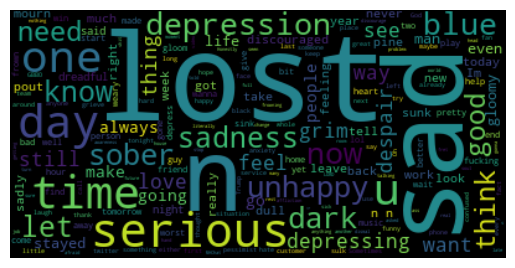

In [29]:
draw_wc('sadness',my_stopwords)

* anger

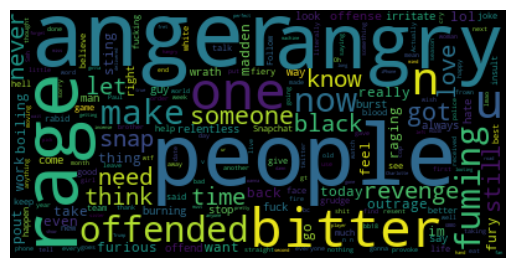

In [30]:
draw_wc('anger',my_stopwords)

* joy

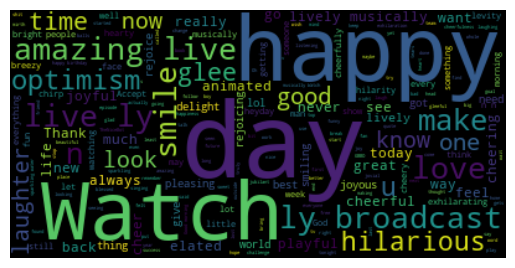

In [31]:
draw_wc('joy',my_stopwords)

* fear

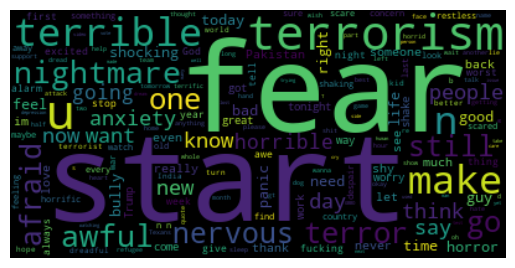

In [32]:
draw_wc('fear',my_stopwords)